# 05_Classification_Models

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn

torch.manual_seed(777)    # reproducible

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Logistic Regression (classification)

### Prepare Data

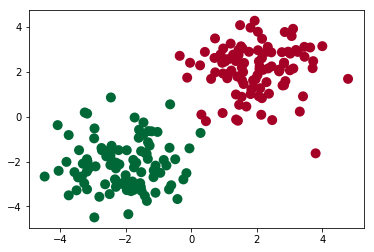

Variable containing:
 2.1037  1.2727  0.0000
 0.6055  1.6903  0.0000
 3.0611  3.6029  0.0000
 0.2707  2.2938  0.0000
 1.3686 -0.1227  0.0000
 1.4421  2.7521  0.0000
 2.8267  2.4107  0.0000
 1.2233  2.0604  0.0000
 2.3337  3.1192  0.0000
 2.4676 -0.1487  0.0000
 2.0814  2.1196  0.0000
 1.7599  2.8999  0.0000
 0.8919  2.7797  0.0000
 2.1911  2.0940  0.0000
 1.3739  2.5911  0.0000
 1.1252  1.9123  0.0000
 1.8342  1.2289  0.0000
 1.5964  1.4613  0.0000
 3.7916 -1.6334  0.0000
 2.1552  0.8299  0.0000
 2.0626  2.4717  0.0000
 1.3626  0.9938  0.0000
 0.9758  3.0467  0.0000
 1.4025  1.7982  0.0000
 2.4505  2.2492  0.0000
 2.1543  2.6171  0.0000
 0.4491 -0.1970  0.0000
 2.6751  2.0910  0.0000
 2.4402  2.8751  0.0000
 2.0844  2.2414  0.0000
 2.2937  1.5455  0.0000
 0.4164  2.8940  0.0000
 1.5180  3.1444  0.0000
 1.5372  0.8921  0.0000
 3.4073  0.9106  0.0000
 1.2784  2.7707  0.0000
 1.5811  1.9958  0.0000
 3.4472  3.1202  0.0000
 1.8103  1.0139  0.0000
 0.3097  0.0952  0.0000
 2.3690  1.0298  0.

In [4]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100,1)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100,1)                # class1 y data (tensor), shape=(100, 1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # shape (200, 1) FloatTensor = 32-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat( (x, y) ,1)

### Define Logistic Model

In [5]:
# Hypothesis using sigmoid and linear model

linear = nn.Linear(2, 1, bias=True)

sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [6]:
model.state_dict()

OrderedDict([('0.weight', 
              -0.6552  0.2604
              [torch.FloatTensor of size 1x2]), ('0.bias', 
               0.3631
              [torch.FloatTensor of size 1])])

### Define Optimizer and Cost Function

In [7]:
# Loss and Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() 
cost_fn = nn.BCELoss() #Binary Cross Entropy Costfunction

### Train 

In [8]:
x.size()

torch.Size([200, 2])

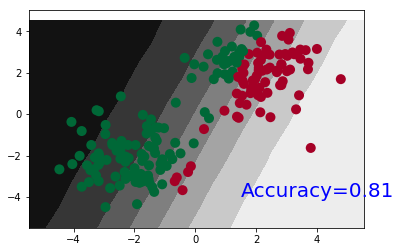

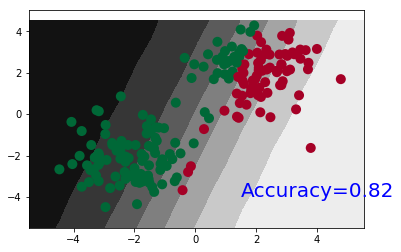

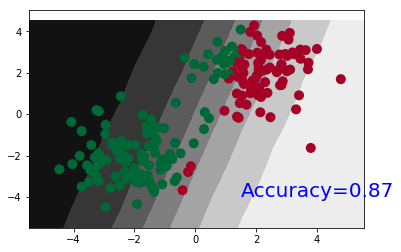

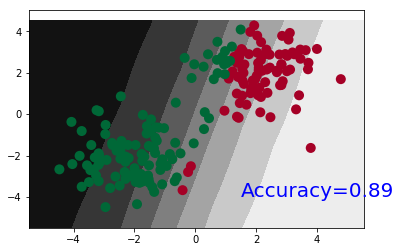

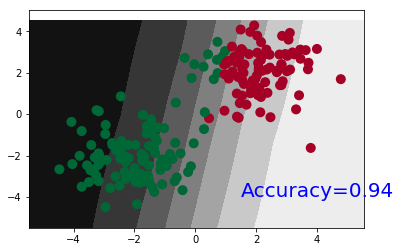

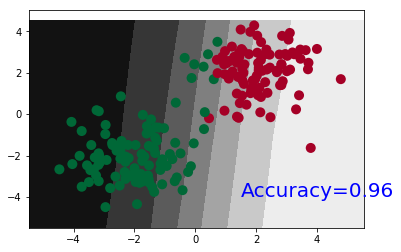

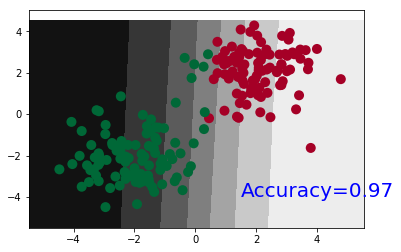

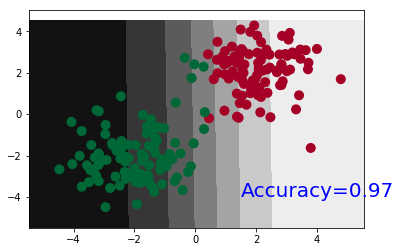

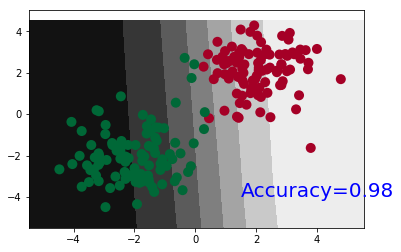

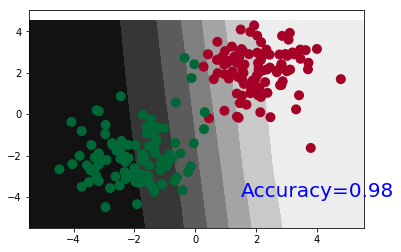

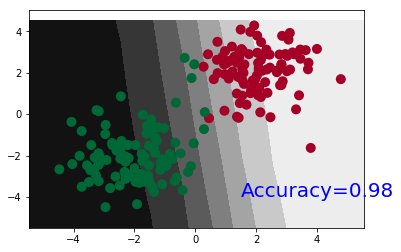

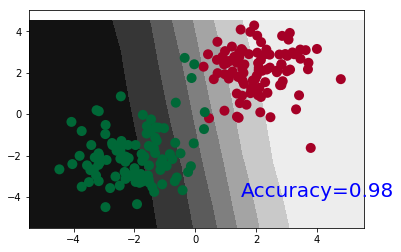

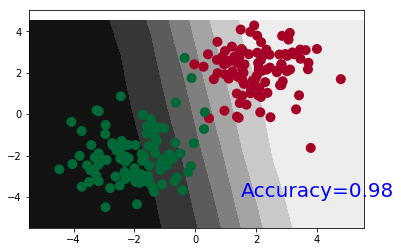

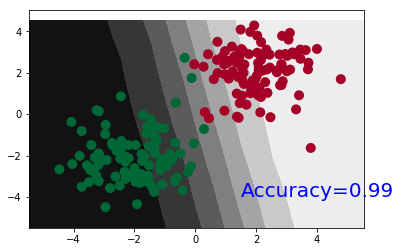

In [9]:
plt.ion()   # something about plotting

for t in range(120):    
    prob = model(x)                 # input x and predict based on x
    cost = cost_fn(prob, y)
    
    optimizer.zero_grad()         # clear gradients for next train
    cost.backward()               # compute gradients
    optimizer.step()              # apply gradients
    
    # ----------------------------------------------------------------------#
    # Ploting
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()
        
        # Draw massgrid
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                             np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

        # here "model" is your model's prediction (classification) function
        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())

        # Put the result into a color plot
        Z = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
        #plt.axis('off')

        # Plot also the training points
        #plt.scatter(x[:, 0].data.numpy(), x[:, 1].data.numpy(), c=pred_y, cmap='RdYlGn')      
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')

        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()

## Softmax Regression (Classification)

### Prepare data

In [14]:
torch.manual_seed(777)  # for reproducibility
nb_classes = 3

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = Variable(torch.Tensor(x_data))
Y = Variable(torch.Tensor(y_data))

_, Y_label = Y.max(dim=1)
print(Y_label)

Variable containing:
 2
 2
 2
 1
 1
 1
 0
 0
[torch.LongTensor of size 8]



### Define Model

In [15]:
# Define our model
linear = torch.nn.Linear(4, 3, bias=True)
#softmax = torch.nn.Softmax() # softmax = exp(logits) / reduce_sum(exp(logits), dim)
model = torch.nn.Sequential(linear)

In [16]:
model

Sequential (
  (0): Linear (4 -> 3)
)

### Define Optimizer and Cost function

In [17]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cost_fn = nn.CrossEntropyLoss() #Cross Entropy Costfunction, SOFTMAX가 내장되어있음

### Train

In [18]:
for step in range(10001):

    prediction = model(X)
    cost = cost_fn(prediction, Y_label)
    optimizer.zero_grad()

    cost.backward()                                 # Compute Gradient of Cost function
    optimizer.step()

    if step % 200 == 0:
        print(step, cost.data.numpy()) 


0 [ 3.88193631]
200 [ 0.62879789]
400 [ 0.52117002]
600 [ 0.4271943]
800 [ 0.33575064]
1000 [ 0.2519398]
1200 [ 0.22303773]
1400 [ 0.20313956]
1600 [ 0.18638301]
1800 [ 0.17208602]
2000 [ 0.15975261]
2200 [ 0.14901161]
2400 [ 0.13957903]
2600 [ 0.13123396]
2800 [ 0.12380204]
3000 [ 0.11714397]
3200 [ 0.1111468]
3400 [ 0.10571852]
3600 [ 0.10078291]
3800 [ 0.09627709]
4000 [ 0.09214784]
4200 [ 0.0883506]
4400 [ 0.08484749]
4600 [ 0.08160595]
4800 [ 0.07859804]
5000 [ 0.07579992]
5200 [ 0.07319035]
5400 [ 0.07075138]
5600 [ 0.06846685]
5800 [ 0.06632277]
6000 [ 0.06430656]
6200 [ 0.06240744]
6400 [ 0.06061539]
6600 [ 0.05892196]
6800 [ 0.05731908]
7000 [ 0.05579985]
7200 [ 0.05435786]
7400 [ 0.05298746]
7600 [ 0.05168356]
7800 [ 0.05044141]
8000 [ 0.04925681]
8200 [ 0.0481258]
8400 [ 0.04704496]
8600 [ 0.04601096]
8800 [ 0.04502089]
9000 [ 0.044072]
9200 [ 0.04316185]
9400 [ 0.04228801]
9600 [ 0.04144853]
9800 [ 0.04064132]
10000 [ 0.03986469]


### Test

In [19]:
# Testing & One-hot encoding
print('--------------')
a = model(Variable(torch.Tensor([[1, 11, 7, 9]])))
print(a.data.numpy(), torch.max(a, 1)[1].data.numpy())

print('--------------')
b = model(Variable(torch.Tensor([[1, 3, 4, 3]])))
print(b.data.numpy(), torch.max(b, 1)[1].data.numpy())

print('--------------')
c = model(Variable(torch.Tensor([[1, 1, 0, 1]])))
print(c.data.numpy(), torch.max(c, 1)[1].data.numpy())

print('--------------')
all = model(Variable(torch.Tensor([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]])))
print(all.data.numpy(), torch.max(all, 1)[1].data.numpy())

--------------
[[ -2.59397793  10.60327339  -6.53052044]] [1]
--------------
[[ 4.86441708 -0.30538726 -3.780509  ]] [0]
--------------
[[-18.35515404   2.11453366  16.44906807]] [2]
--------------
[[ -2.59397793  10.60327339  -6.53052044]
 [  4.86441612  -0.30538678  -3.780509  ]
 [-18.35515594   2.11453366  16.44906807]] [1 0 2]
